Found 983 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


<ipython-input-2-2c29a71294fc>:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


Epoch 1/5
31/31 [==============================] - 804s 26s/step - loss: 1.1949 - accuracy: 0.5148 - val_loss: 0.8898 - val_accuracy: 0.6257
Epoch 2/5
31/31 [==============================] - 750s 24s/step - loss: 0.6805 - accuracy: 0.6999 - val_loss: 0.9689 - val_accuracy: 0.6023
Epoch 3/5
31/31 [==============================] - 747s 24s/step - loss: 0.6131 - accuracy: 0.7365 - val_loss: 0.8567 - val_accuracy: 0.6082
Epoch 4/5
31/31 [==============================] - 706s 23s/step - loss: 0.4791 - accuracy: 0.8138 - val_loss: 0.8418 - val_accuracy: 0.6257
Epoch 5/5
31/31 [==============================] - 748s 24s/step - loss: 0.3798 - accuracy: 0.8678 - val_loss: 0.9939 - val_accuracy: 0.6023


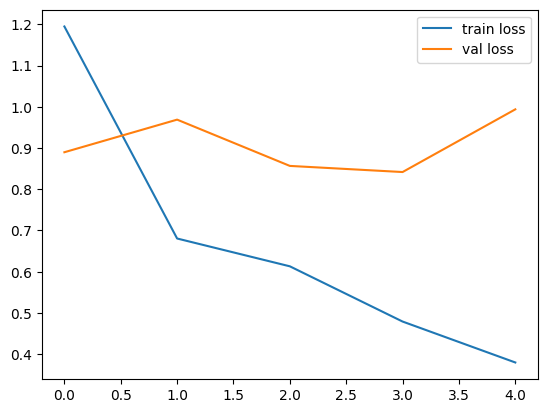

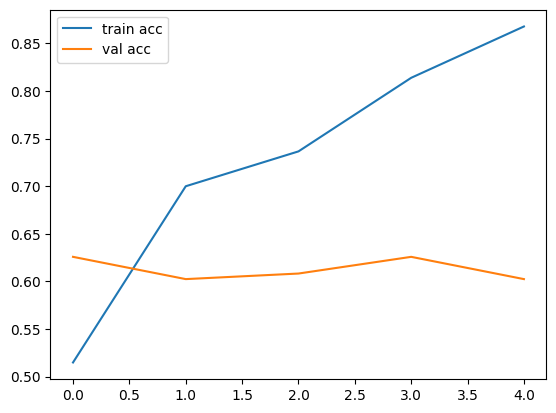

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define image size
IMAGE_SIZE = [224, 224]

# Load the pre-trained VGG16 model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the layers of the pre-trained VGG16 model
for layer in vgg.layers:
    layer.trainable = False

# Specify the number of classes
num_classes = 3  # Adjust this according to your dataset

# Flatten the output of VGG16
x = Flatten()(vgg.output)

# Add a dense layer with softmax activation for classification
prediction = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=vgg.input, outputs=prediction)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('training_dataset',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('testing_dataset',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

# Train the model
history = model.fit_generator(training_set,
                              validation_data=test_set,
                              epochs=5,
                              steps_per_epoch=len(training_set),
                              validation_steps=len(test_set))

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Save the model
model.save('severity.h5')


In [ ]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Load the model
model = load_model('locationof/severity.h5')

# Function to preprocess a single image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Assuming input size is 224x224
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values to [0, 1]
    return img_array

# Function to classify a single image
def classify_single_image(image_path):
    preprocessed_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    class_labels = ['minor', 'moderate', 'severe']
    predicted_class = np.argmax(prediction)
    return class_labels[predicted_class]

# Path of the single input image to classify
input_image_path = '/path/to/your/single/image.jpg'

# Classify the single input image
result = classify_single_image(input_image_path)

# Print the result
print("The image is classified as:", result)


1/1 [==============================] - 1s 1s/step
The image is classified as: moderate
